try making square images by
- take a slice of a fringe image without a gauge, 
- scale it in x, 
- cut  out  a slice patch, shift it by n pixels
- then paste it back as a square patch in center of image 
- find the fringe spacing of original slice from `findfringes2` f pixels
- fringe fraction should equal n/f


In [1]:
from pathlib import Path


from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import matplotlib


from ls_fringeapp import fringeprocess as fp
from ls_fringeapp.load_equipment_data import repo_folder
from ls_fringeapp import plot_helpers as ph

Equipment Register loaded from /home/elfnor/gits/Length_Stds_Equipment_Register/register.xml
{'red': 632.991212579, 'green': 532.245576449053}


In [2]:
TEST_DATA_DIR = repo_folder / "tests" / "data"
fn1 = "MSL-01_08-R.jpg"
fn2 = "MSL-01_10-R.jpg"

# the right  side of "MSL-01_10-R.jpg" looks nice

In [3]:
img_filename = TEST_DATA_DIR / fn2
img = Image.open(img_filename)


(np.float64(-0.5), np.float64(755.5), np.float64(999.5), np.float64(-0.5))

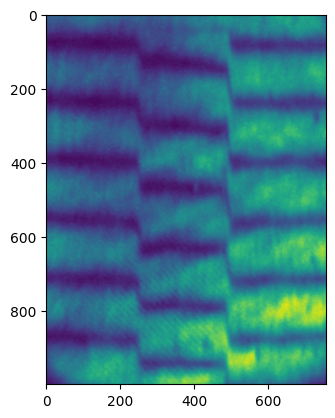

In [4]:
img_array = fp.img2greyarray(img)
plt.imshow(img_array)
plt.axis("image")

In [5]:
# box - The crop rectangle, as a (left, upper, right, lower) tuple.
box = (500, 0, img.size[0], img.size[1])
img1 = img.crop(box)

scale = 5.0
size = (int(scale * img1.size[0]), img1.size[1])
img2 = img1.resize(size)


In [6]:
# find the fringe spacing in pixels
img2_arr = fp.img2greyarray(img2)
pklist = fp.pkfind(img2_arr)
y = img2_arr[:, 0]  # 1st column of array
bwp = np.ones_like(img2_arr)
slope, intercepts = fp.findfringes2(y, bwp, pklist)
spacing = np.diff(intercepts).mean()

spacing

np.float64(158.52487065056073)

In [7]:
np.diff(intercepts)

array([154.75381184, 159.53863188, 161.54307002, 157.35880227,
       159.43003724])

In [8]:
np.ptp(np.diff(intercepts))

np.float64(6.789258174958235)

In [9]:
ffrac_set = 0.8

yshift = (1, 0, 0, 0, 1, ffrac_set * spacing)
img3 = img2.transform(img2.size, Image.Transform.AFFINE, data=yshift)

In [10]:
# box - The crop rectangle, as a (left, upper, right, lower) tuple.
gb_size = 700
gb_box = (0, 0, gb_size, gb_size)
img4 = img3.crop(gb_box)


img5.size=(1280, 1000)


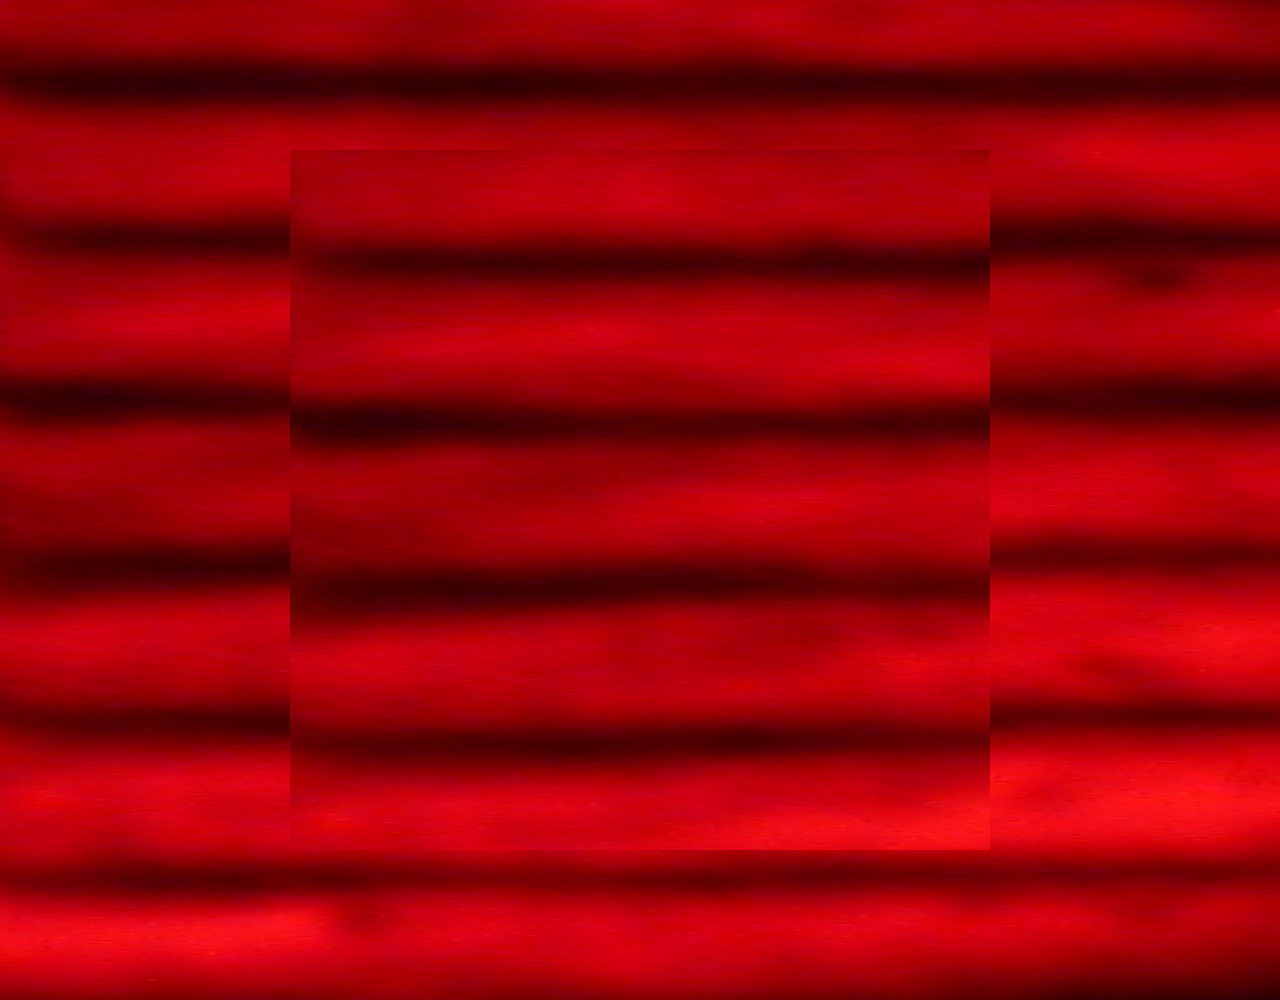

In [ ]:
img5 = img2.copy()
top_left = ((img5.size[0] - gb_size) // 2, (img5.size[1] - gb_size) // 2)
img5.paste(img4, top_left)
print(f"{img5.size=}")
img5

In [12]:
img5_arr = fp.img2greyarray(img5)
gb_xy = np.array(
    [
        top_left,
        (top_left[0], top_left[1] + gb_size),
        (top_left[0] + gb_size, top_left[1] + gb_size),
    ]
)
gb_yx = gb_xy[:, [1, 0]]
gb_yx

array([[150, 290],
       [850, 290],
       [850, 990]])

In [13]:
ffrac_calc, drawdata = fp.array2frac(img5_arr, gb_yx, drawinfo=True, border=(0.1, 0.1))
ffrac_calc

np.float64(0.8439629681325991)

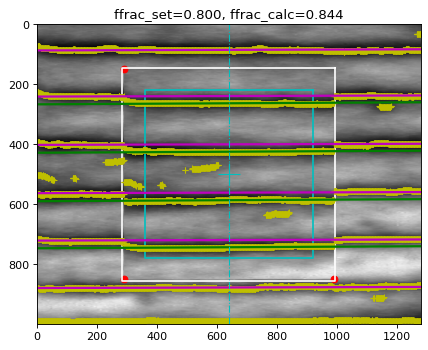

In [14]:
fig = plt.figure(figsize=(6, 6), dpi=80)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.set_title(f"{ffrac_set=:.3f}, {ffrac_calc=:.3f}")
ph.draw_gauge(axes, img5_arr, drawdata)

In [15]:
0.05 * spacing

np.float64(7.926243532528037)

In [16]:
2.4 / (633 / 2)

0.007582938388625592